<a href="https://colab.research.google.com/github/kikecastillocolombia/telecomx/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [2]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
# Mostrar resumen general con info()
df.info()

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)

# Mostrar las primeras 5 filas para ver algunos datos
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Tipos de datos por columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Primeras 5 filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'M

In [4]:
counts = df['Churn'].value_counts(dropna=False)
percentages = df['Churn'].value_counts(normalize=True, dropna=False) * 100
pd.DataFrame({'counts': counts, 'percentages': percentages})


,counts,percentages
Churn,,
No,5174,71.198569
Yes,1869,25.719004
,224,3.082427


In [5]:
df.loc[~df['Churn'].isin(['Yes', 'No']), 'Churn'].unique()


array([''], dtype=object)

### Comprobación de incoherencias en los datos

In [6]:
#1. Revisar valores nulos por columna
print('Valores nulos por columna:')
print(df.isnull().sum())

#2. Revisar valores vacios('') por columna
print('\nValores vacios('') por columna:')
print((df == '').sum())

# 3. Revisar valores duplicados segun customerID
print("\nNúmero de filas duplicadas según customerID:")
print(df.duplicated(subset=['customerID']).sum())


# 4.Revisar valores únicos en columnas categóricas clave
print('\nValores únicos es "Churn":')
print(df['Churn'].unique())



Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Valores vacios() por columna:
customerID      0
Churn         224
customer        0
phone           0
internet        0
account         0
dtype: int64

Número de filas duplicadas según customerID:
0

Valores únicos es "Churn":
['No' 'Yes' '']


In [7]:
import ast

# Función auxiliar para convertir string a dict
def convertir_a_dict(columna):
    return columna.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Convertir strings a diccionarios reales
df['customer'] = convertir_a_dict(df['customer'])
df['phone'] = convertir_a_dict(df['phone'])
df['internet'] = convertir_a_dict(df['internet'])
df['account'] = convertir_a_dict(df['account'])

# Expandir cada columna en múltiples columnas
df_customer = pd.json_normalize(df['customer']).add_prefix('customer_')
df_phone = pd.json_normalize(df['phone']).add_prefix('phone_')
df_internet = pd.json_normalize(df['internet']).add_prefix('internet_')
df_account = pd.json_normalize(df['account']).add_prefix('account_')

# Concatenar columnas expandidas con df original
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                df_customer, df_phone, df_internet, df_account], axis=1)

# Confirmar estructura final
print("Nuevas columnas del DataFrame:\n")
print(df.columns)


Nuevas columnas del DataFrame:

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')


In [8]:
# 1. Valores nulos
print("Valores nulos por columna:\n")
print(df.isnull().sum())

# 2. Valores vacíos como texto ''
print("\nValores vacíos ('') por columna:\n")
print((df == '').sum())

# 3. Tipos de datos por columna
print("\nTipos de datos por columna:\n")
print(df.dtypes)

# 4. Duplicados (ahora sí debe funcionar)
print("\nNúmero de filas duplicadas:\n")
print(df.duplicated().sum())


Valores nulos por columna:

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64

Valores vacíos ('') por columna:

customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner               0
customer_Dependents            0
customer_tenure                0
phone_PhoneService             0
phone_Mul

In [9]:
# 1. Reemplazar valores vacíos en 'Churn' por 'desconocido'
df['Churn'] = df['Churn'].replace('', 'desconocido')

# 2. Pasar todos los valores de texto a minúsculas y quitar espacios
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower().str.strip()

# 3. Eliminar filas duplicadas
df = df.drop_duplicates()

# 4. Verificar que se aplicaron los cambios
print("Valores únicos en 'Churn':", df['Churn'].unique())
print("\nNúmero de filas después de limpieza:", df.shape[0])


Valores únicos en 'Churn': ['no' 'yes' 'desconocido']

Número de filas después de limpieza: 7267


In [10]:
print(df.columns)


Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')


In [11]:
# Convertir la columna de facturación mensual a float y calcular el valor diario
df['Cuentas_Diarias'] = df['account_Charges.Monthly'].astype(float) / 30


In [12]:
df[['account_Charges.Monthly', 'Cuentas_Diarias']].head()


,account_Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [13]:
# Convertir todos los 'Yes' y 'No' a 1 y 0
yes_no_map = {'Yes': 1, 'No': 0}

# Identificar columnas con 'Yes'/'No' para aplicar la conversión
binary_columns = [col for col in df.columns if df[col].isin(['Yes', 'No']).any()]

# Aplicar el mapeo
df[binary_columns] = df[binary_columns].replace(yes_no_map)

# Confirmar los cambios
print("✔️ Columnas transformadas a valores binarios:")
print(binary_columns)
df[binary_columns].head()


✔️ Columnas transformadas a valores binarios:
[]


""
0
1
2
3
4


In [14]:
# 1. Seleccionar columnas numéricas relevantes
columnas_numericas = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias']

# Forzamos a numérico (los valores no convertibles quedan como NaN)
cols_to_numeric = [
    'account_Charges.Total',
    'account_Charges.Monthly',
    'customer_tenure',
    'Cuentas_Diarias'
]

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Re-ejecutamos describe y mediana
numeric_stats = df[cols_to_numeric].describe()
medianas = df[cols_to_numeric].median()

print("📊 Estadísticas Generales (actualizadas):")
display(numeric_stats)

print("\n🔹 Medianas (actualizadas):")
print(medianas)

print("\n📊 Estadísticas por Churn (0 = no se fue, 1 = sí se fue):")
display(df.groupby('Churn')[cols_to_numeric].describe())


📊 Estadísticas Generales (actualizadas):


,account_Charges.Total,account_Charges.Monthly,customer_tenure,Cuentas_Diarias
count,7256.000000,7267.000000,7267.000000,7267.000000
mean,2280.634213,64.720098,32.346498,2.157337
std,2268.632997,30.129572,24.571773,1.004319
min,18.800000,18.250000,0.000000,0.608333
25%,400.225000,35.425000,9.000000,1.180833
50%,1391.000000,70.300000,29.000000,2.343333
75%,3785.300000,89.875000,55.000000,2.995833
max,8684.800000,118.750000,72.000000,3.958333



🔹 Medianas (actualizadas):
account_Charges.Total      1391.000000
account_Charges.Monthly      70.300000
customer_tenure              29.000000
Cuentas_Diarias               2.343333
dtype: float64

📊 Estadísticas por Churn (0 = no se fue, 1 = sí se fue):


account_Charges.Total                                             \
                            count         mean          std    min       25%   
Churn                                                                          
desconocido                 224.0  2196.933705  2329.961954  18.90  351.0375   
no                         5163.0  2555.344141  2329.456984  18.80  577.8250   
yes                        1869.0  1531.796094  1890.822994  18.85  134.5000   

                                          account_Charges.Monthly             \
                  50%        75%      max                   count       mean   
Churn                                                                          
desconocido  1163.175  3562.8625  8425.30                   224.0  63.412277   
no           1683.600  4264.1250  8672.45                  5174.0  61.265124   
yes           703.550  2331.3000  8684.80                  1869.0  74.441332   

             ... customer_tenure       Cuentas_Diarias                      \
             ...             75%   max           count      mean       std   
Churn        ...                                                             
desconocido  ...            56.0  72.0           224.0  2.113743  1.046290   
no           ...            61.0  72.0          5174.0  2.042171  1.036422   
yes          ...            29.0  72.0          1869.0  2.481378  0.822202   

                                                               
                  min       25%       50%       75%       max  
Churn                                                          
desconocido  0.625000  0.947500  2.303333  3.013750  3.851667  
no           0.608333  0.836667  2.147500  2.946667  3.958333  
yes          0.628333  1.871667  2.655000  3.140000  3.945000  

[3 rows x 32 columns]

In [15]:
# Verificar datos en Churn
print("Valores únicos en Churn:", df['Churn'].unique())
print("Cantidad de valores nulos en Churn:", df['Churn'].isnull().sum())
print("Conteo de valores en Churn (incluyendo nulos):")
print(df['Churn'].value_counts(dropna=False))


Valores únicos en Churn: ['no' 'yes' 'desconocido']
Cantidad de valores nulos en Churn: 0
Conteo de valores en Churn (incluyendo nulos):
Churn
no             5174
yes            1869
desconocido     224
Name: count, dtype: int64


#📊 Carga y análisis

Valores únicos en Churn después de eliminar 'desconocido': ['no' 'yes']
Cantidad de valores nulos en Churn: 0


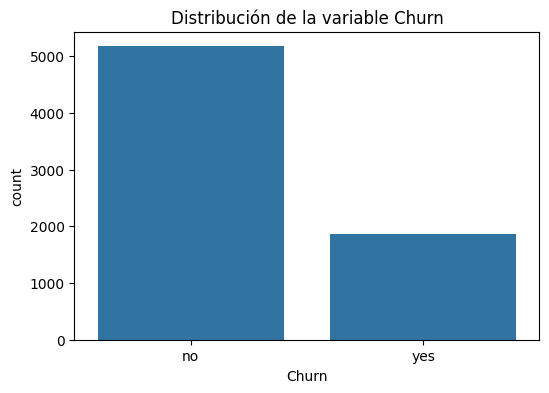

  Churn  Churn_bin
0    no          0
1    no          0
2   yes          1
3   yes          1
4   yes          1


In [16]:
# Paso 1: Eliminar filas con 'desconocido' en Churn
df = df[df['Churn'] != 'desconocido'].copy()

# Paso 2: Verificar valores únicos y nulos restantes
print("Valores únicos en Churn después de eliminar 'desconocido':", df['Churn'].unique())
print("Cantidad de valores nulos en Churn:", df['Churn'].isnull().sum())

# Paso 3: Visualizar distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de la variable Churn')
plt.show()

# Paso 4: Convertir Churn a binario
df['Churn_bin'] = df['Churn'].map({'no': 0, 'yes': 1})

print(df[['Churn', 'Churn_bin']].head())


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")


In [18]:
def plot_churn_by_category(df, column_name):
    churn_rates = df.groupby(column_name)['Churn_bin'].mean().sort_values()

    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")
    plt.title(f'Tasa de Churn por {column_name}', fontsize=14)
    plt.ylabel('Tasa de Churn')
    plt.xlabel(column_name)
    plt.xticks(rotation=30)
    plt.ylim(0, 1)

    for i, rate in enumerate(churn_rates.values):
        ax.text(i, rate + 0.02, f"{rate:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


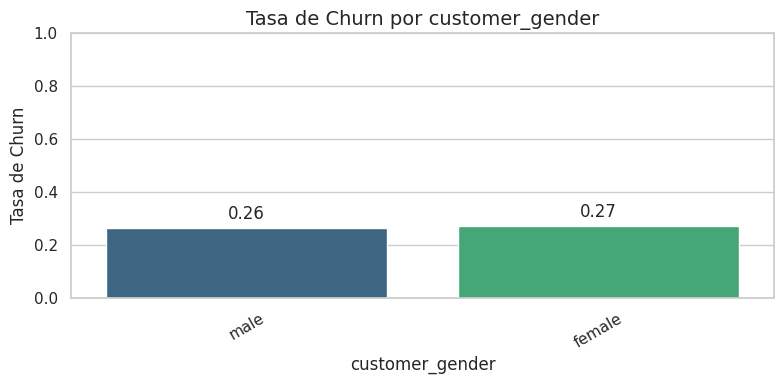

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


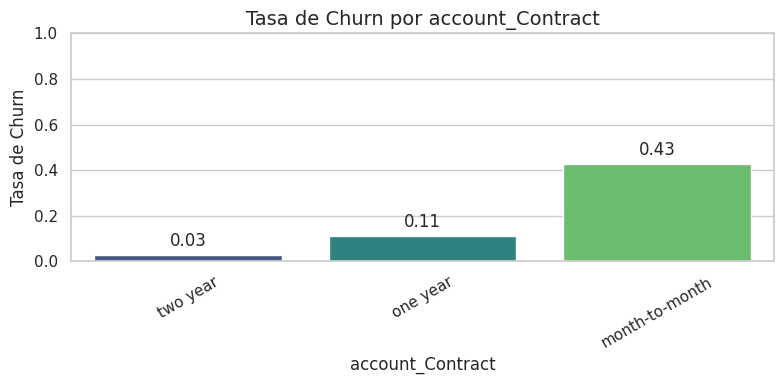

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


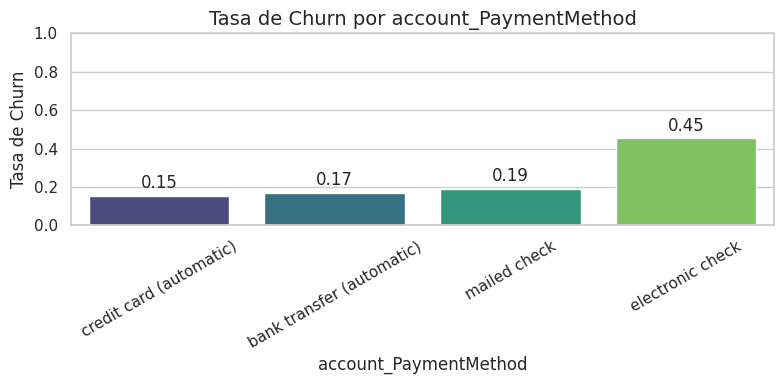

In [19]:
plot_churn_by_category(df, 'customer_gender')
plot_churn_by_category(df, 'account_Contract')
plot_churn_by_category(df, 'account_PaymentMethod')


<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


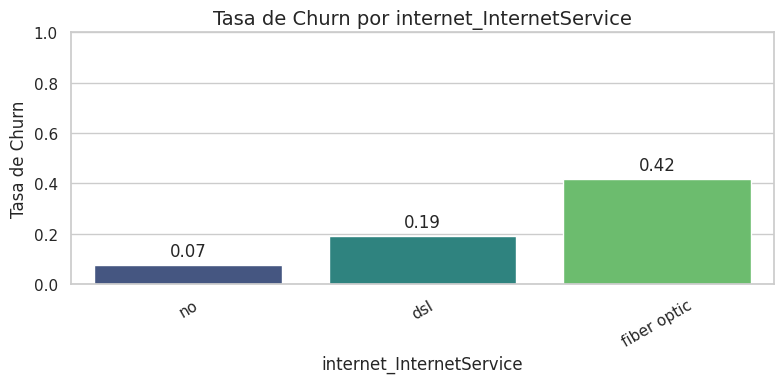

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


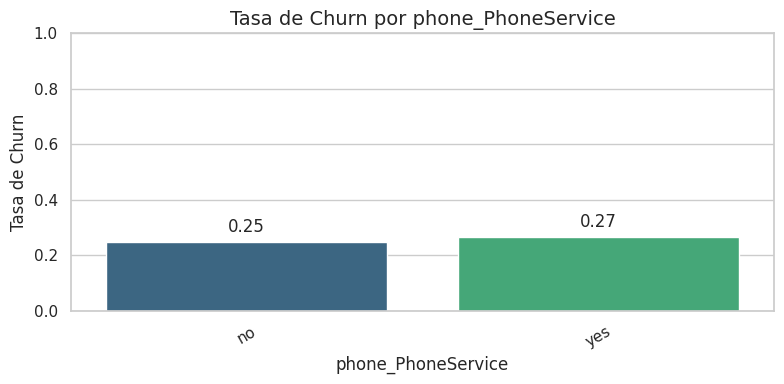

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


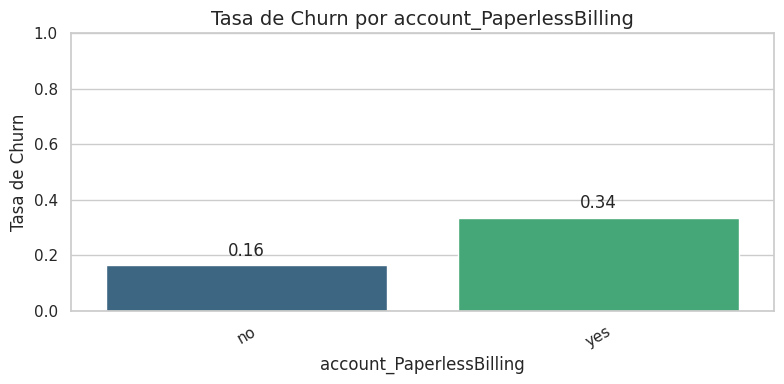

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


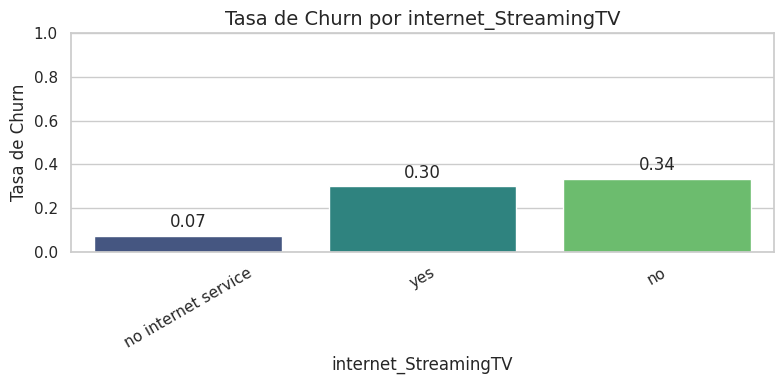

<ipython-input-18-d07721db0ba4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rates.index, y=churn_rates.values, palette="viridis")


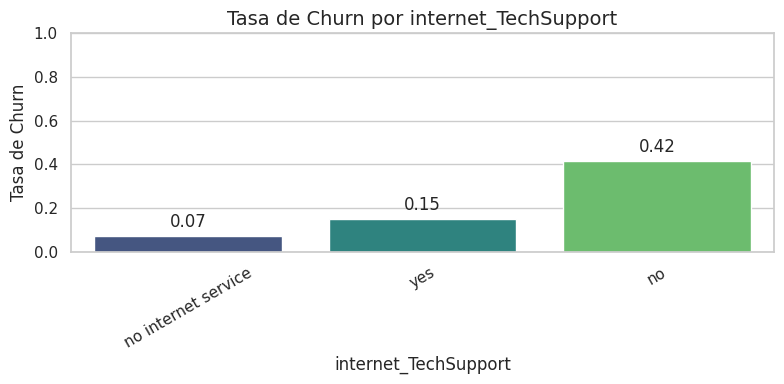

In [20]:
plot_churn_by_category(df, 'internet_InternetService')
plot_churn_by_category(df, 'phone_PhoneService')
plot_churn_by_category(df, 'account_PaperlessBilling')
plot_churn_by_category(df, 'internet_StreamingTV')
plot_churn_by_category(df, 'internet_TechSupport')


<ipython-input-21-0ac7477de66c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-0ac7477de66c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-0ac7477de66c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-0ac7477de66c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


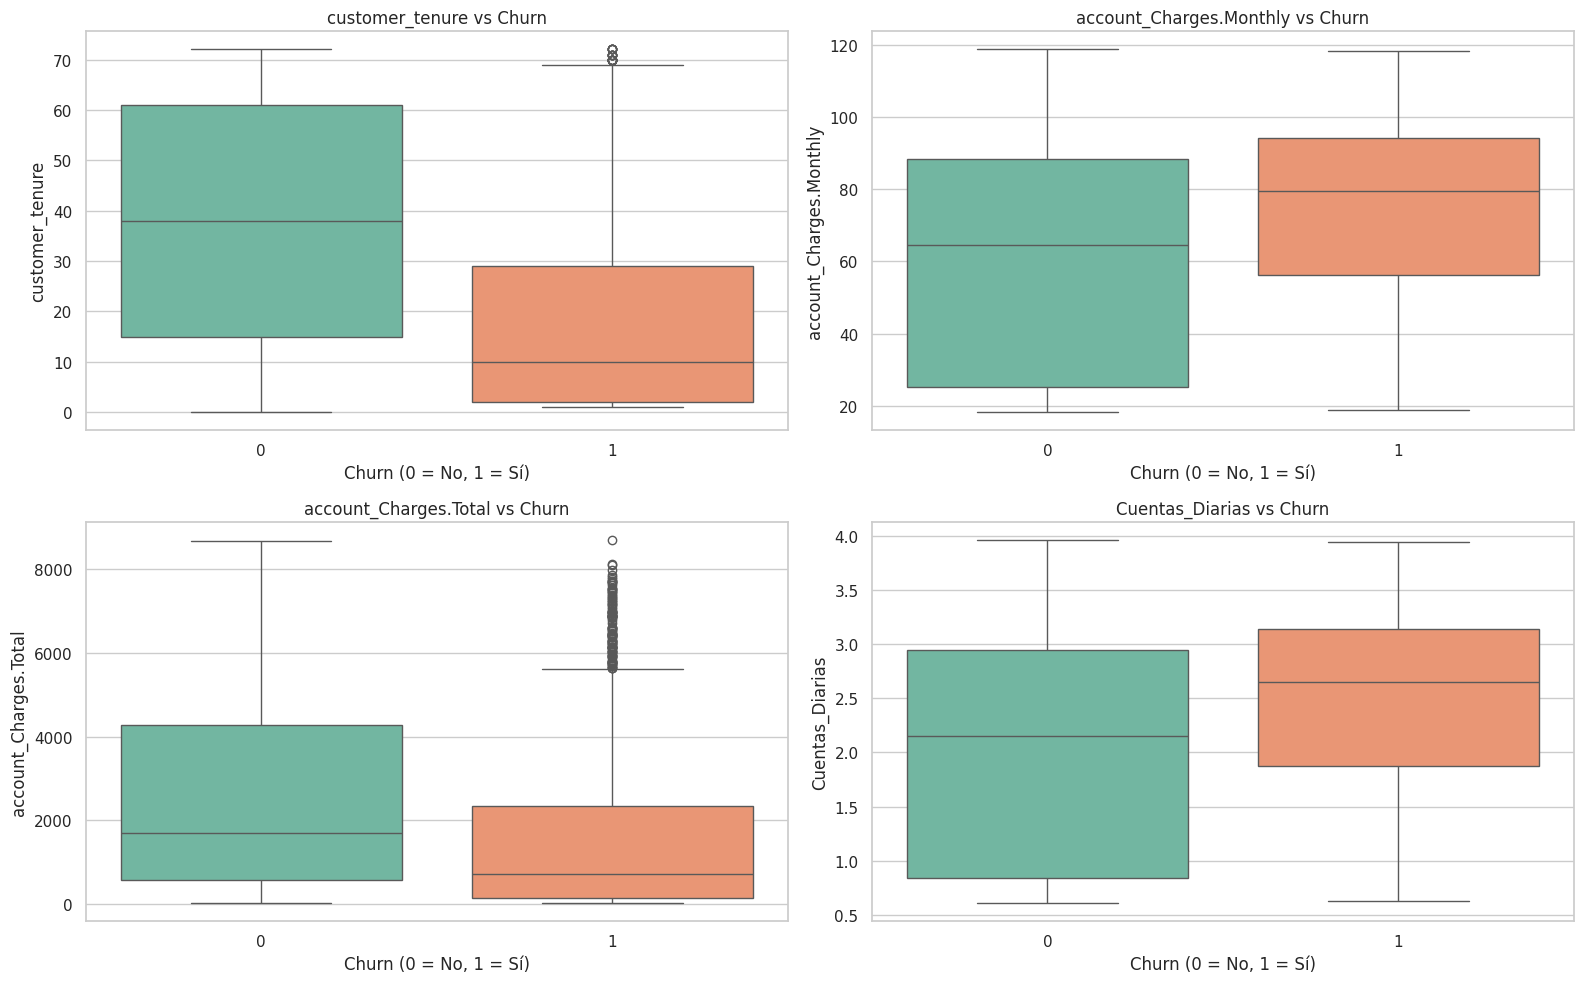

In [21]:
# Estilo de gráficos
sns.set(style="whitegrid")

# Lista de variables numéricas a explorar
variables_numericas = [
    "customer_tenure",
    "account_Charges.Monthly",
    "account_Charges.Total",
    "Cuentas_Diarias"
]

# Gráficos en varias filas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Iterar sobre las variables y graficarlas
for var, ax in zip(variables_numericas, axes.flatten()):
    sns.boxplot(
        data=df,
        x="Churn_bin",
        y=var,
        ax=ax,
        palette=["#66c2a5", "#fc8d62"]
    )
    ax.set_title(f"{var} vs Churn")
    ax.set_xlabel("Churn (0 = No, 1 = Sí)")
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

#📄Informe final

# Informe de Análisis de Evasión de Clientes (Churn)

---

## 1. Introducción

El objetivo de este análisis es entender el fenómeno de evasión de clientes (churn) en nuestra base de datos. La evasión representa la pérdida de clientes que deciden cancelar el servicio, lo que afecta directamente los ingresos y la sostenibilidad del negocio. Mediante este análisis exploratorio buscamos identificar patrones y características asociadas a la evasión para facilitar estrategias que reduzcan este problema.

---

## 2. Limpieza y Tratamiento de Datos

Se importaron los datos y se detectaron inconsistencias como valores nulos y duplicados. Se reemplazaron valores desconocidos en la variable `Churn` y se eliminaron filas con estos valores. También se estandarizaron columnas y se crearon variables derivadas como `Cuentas_Diarias` para mejorar el análisis.

Además, se transformaron variables categóricas a formato binario cuando fue necesario para facilitar la interpretación.

---

## 3. Análisis Exploratorio de Datos

### 3.1 Distribución General de Evasión (Churn)



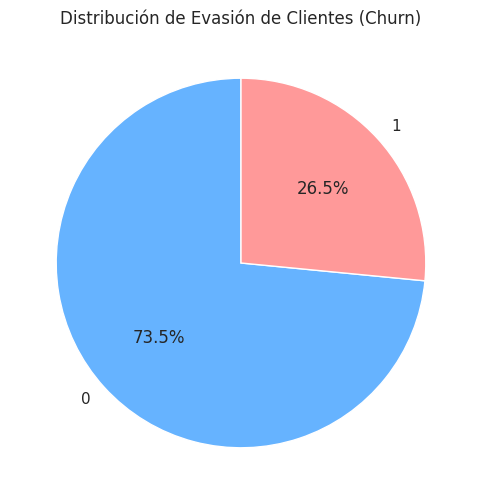

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
churn_counts = df['Churn'].value_counts()
plt.pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ff9999']
)
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.show()

###3.2 Análisis por Variables Categóricas
Género vs Churn

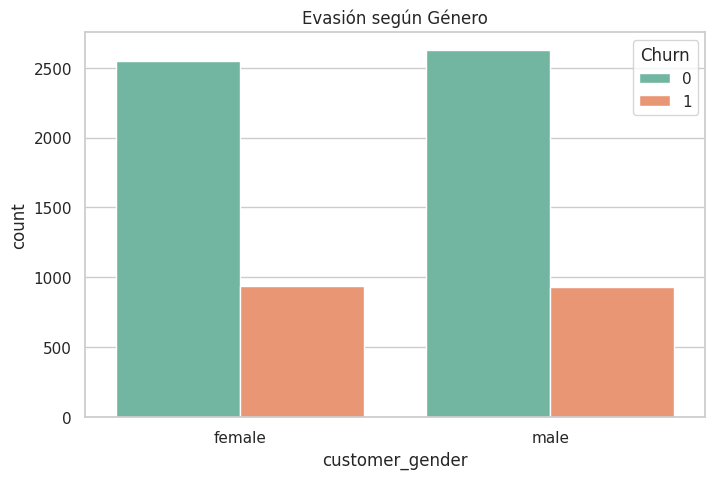

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='customer_gender', hue='Churn', palette='Set2')
plt.title('Evasión según Género')
plt.show()


###Tipo de Contrato vs Churn


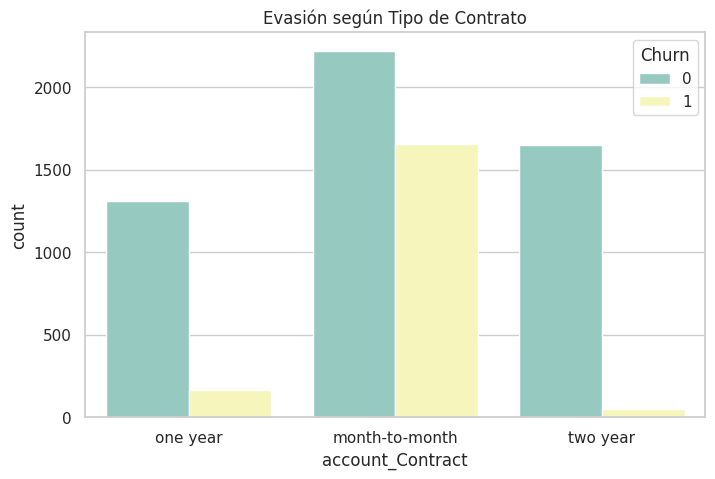

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='account_Contract', hue='Churn', palette='Set3')
plt.title('Evasión según Tipo de Contrato')
plt.show()


###Método de Pago vs Churn

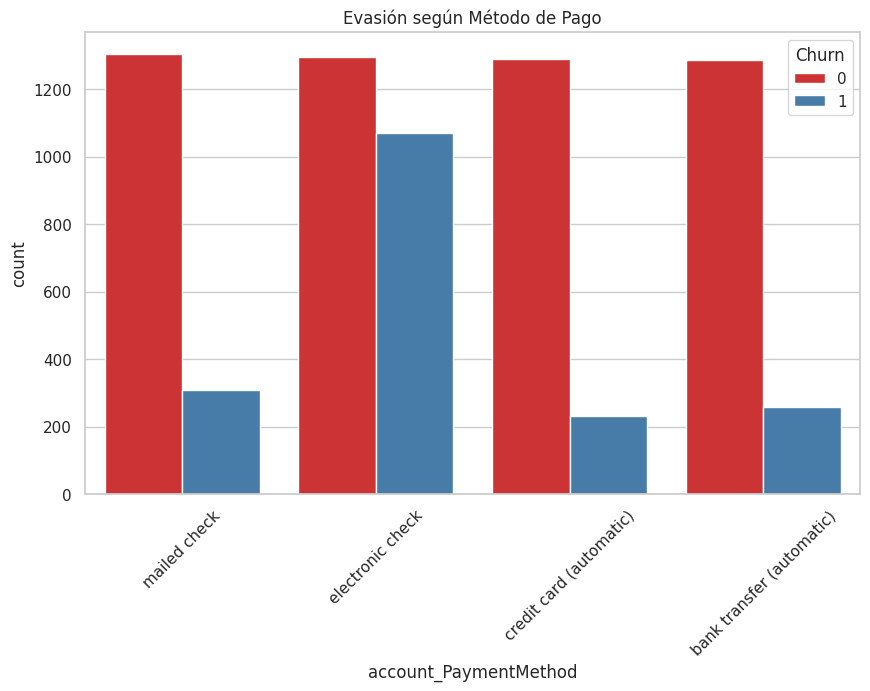

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='account_PaymentMethod', hue='Churn', palette='Set1')
plt.title('Evasión según Método de Pago')
plt.xticks(rotation=45)
plt.show()


###3.3 Variables Numéricas y Evasión


<ipython-input-31-f39f214d36a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='pastel')


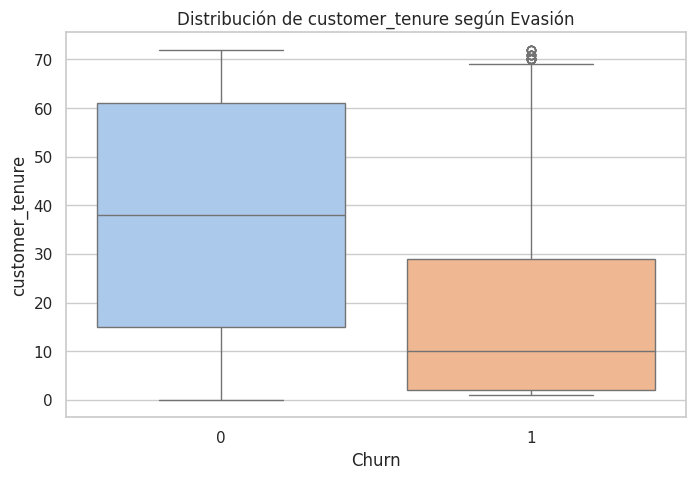

<ipython-input-31-f39f214d36a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='pastel')


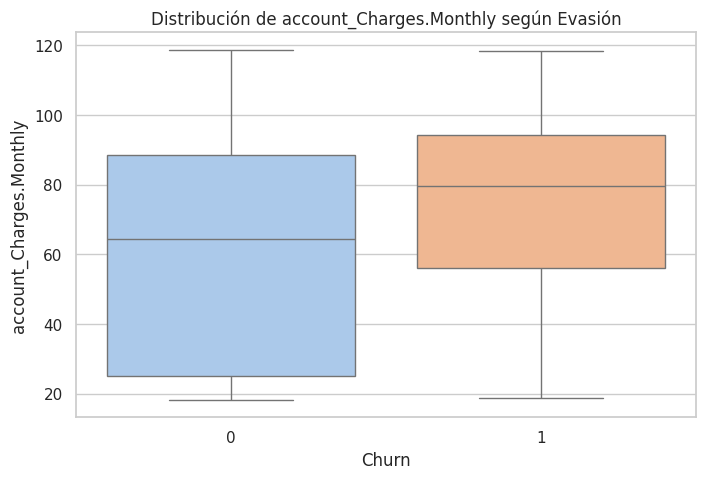

<ipython-input-31-f39f214d36a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='pastel')


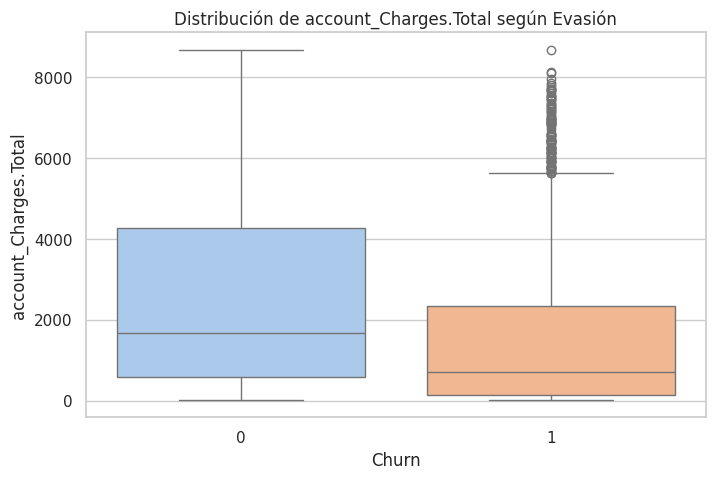

<ipython-input-31-f39f214d36a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=df, palette='pastel')


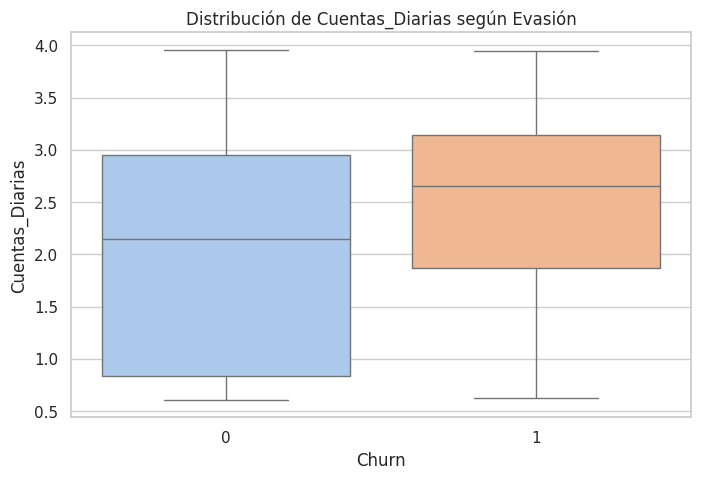

In [31]:
num_vars = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias']

for var in num_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=var, data=df, palette='pastel')
    plt.title(f'Distribución de {var} según Evasión')
    plt.show()


###4. Conclusiones e Insights
La mayoría de los clientes no cancelan el servicio, pero una proporción significativa sí lo hace (~26%).

Clientes con ciertos tipos de contrato o métodos de pago muestran mayor tasa de evasión.

Variables numéricas como el tiempo con la empresa y la facturación mensual parecen influir en la evasión. Clientes con menor tiempo y menor facturación mensual tienden a cancelar más.

El género también muestra una ligera diferencia en la evasión, con clientes de cierto género presentando mayor tendencia.

Estos hallazgos pueden orientar estrategias específicas para retener clientes con riesgo de evasión.

###5. Recomendaciones
Focalizar campañas de retención en clientes con contratos a corto plazo o métodos de pago asociados a mayor evasión.

Ofrecer incentivos o planes personalizados para clientes con baja facturación o menor tiempo en la empresa.

Monitorear de cerca los segmentos demográficos donde se observe mayor tasa de cancelación.

Continuar recolectando datos y realizar análisis periódicos para ajustar las estrategias.